In [1]:
import oritelib as orite
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
og_seq = orite.seq_from_fasta("test_data/eco_k12.fasta")
nc_intervals = orite.genbank_to_non_coding_intervals("test_data/eco_k12.gb")
og_gc, og_cgc = orite.gc_skew_sliding_window(og_seq, 1000)

In [3]:
max_things = orite.max_rotate_seq_and_skew_calc(og_seq, window_radius=250000)

inital max gc skew indx 4620639
max cgc skew indx 1599755


In [4]:
max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]

In [5]:
nc_intervals_list =nc_intervals[0]

In [6]:
def get_phased_nc_region_list(nc_intervals, og_fasta, max_offset, max_cgc):
    nc_objects = orite.nc_intervals_to_nc_objects(nc_intervals, og_fasta)
    phased_nc_objects = orite.add_max_relative_position(nc_objects, len(og_fasta), max_offset)
    max_scored_nc_objects = orite.calc_score_over_region_list(phased_nc_objects, max_cgc, rotated = True)
    return max_scored_nc_objects
    

In [45]:
x0 = get_phased_nc_region_list(nc_intervals_list, og_seq, max_offset, max_cgc)

In [46]:
#nc_region_list = orite.nc_intervals_to_nc_objects(nc_intervals_list)

In [47]:
len(x0)

3400

In [48]:
x1 = orite.get_kmers_from_region_list(x0, [ 6, 7, 8, 9, 10])
len(x1)

3400

In [49]:
x2 = orite.filter_region_list_by_kmer_occurence(x1, 3)

In [50]:
x3 = orite.filter_empty_kmer_regions(x2)

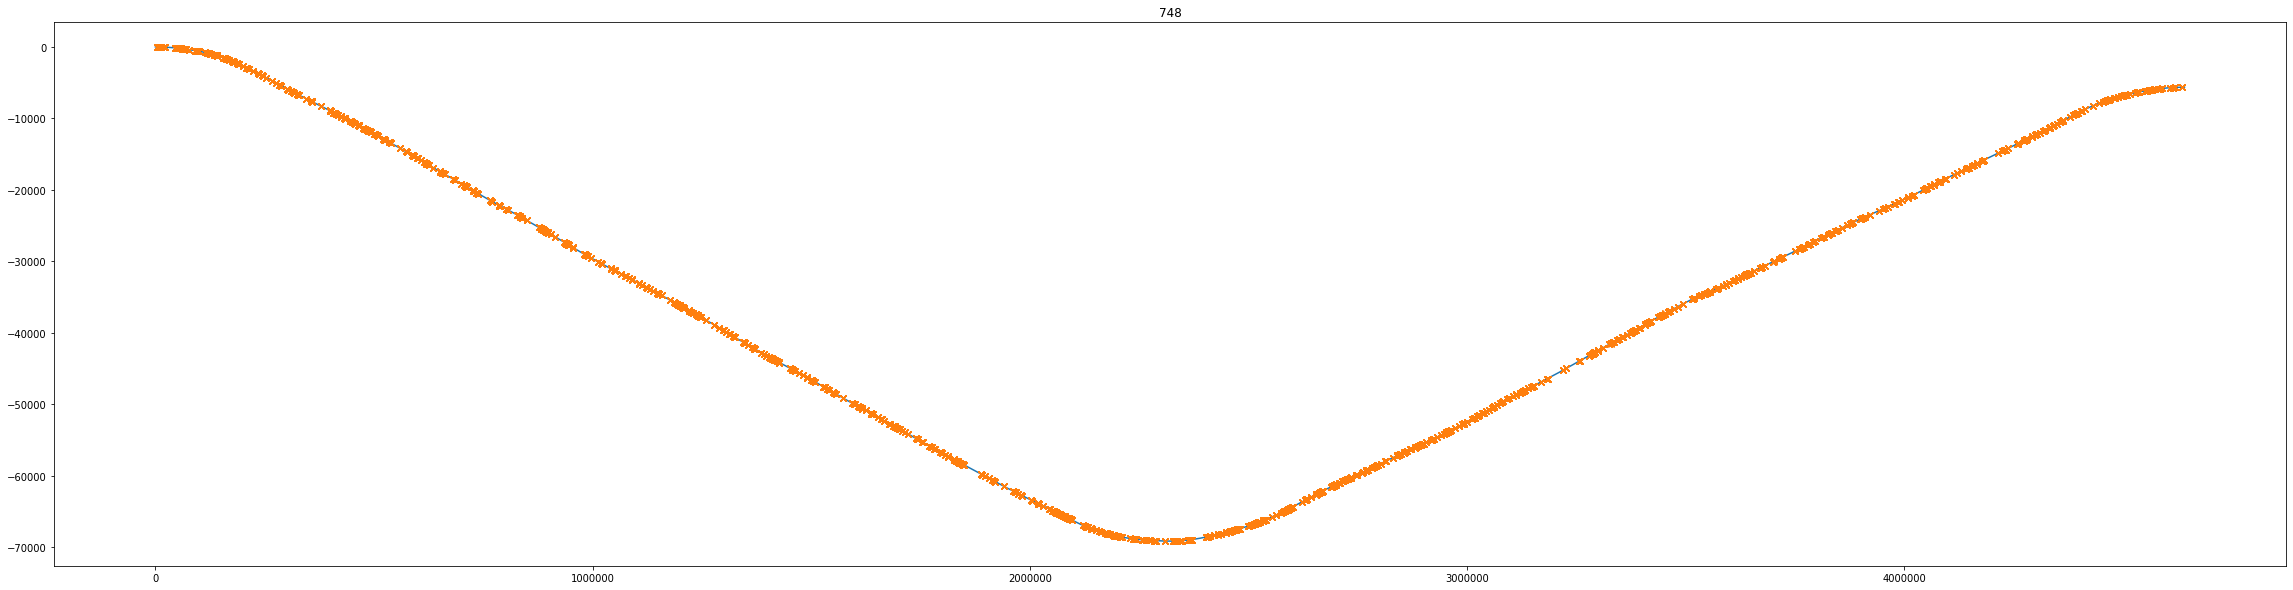

In [51]:
orite.plot_region_list(x3, max_cgc, rotated=True)

In [52]:
x4 = orite.filter_regions_by_length(x3, 50)
len(x4)

746

In [53]:
def calc_density_for_region_list(region_list):
    new_list = []
    
    for region in region_list:
        region.calc_kmer_density()
        new_list.append(region)
    return new_list
    

In [54]:
x5 = calc_density_for_region_list(x4)

In [55]:
def filter_out_empty_kmer_key_in_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.filter_out_empty_kmer_lists_in_kmer_dict()
        new_list.append(region)
    return new_list
    

In [56]:
def sort_region_list_on_density(region_list):
    
    new_list = []
    
    for region in region_list:
        region.sort_kmer_info_by_density()
        new_list.append(region)
    return new_list


In [57]:
x6 = filter_out_empty_kmer_key_in_region_list(x5)

In [58]:
x7 = sort_region_list_on_density(x6)

In [59]:
i = 0
k = 6
bla_list = []
for region in x7: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            bla_list.append(line)
       

In [60]:
bla_list.sort(key = lambda x:x[2], reverse = True)

In [61]:
x7[3].kmer_info

{6: [('CGAGGC', [3, 97, 113, 121], 0.125)]}

In [62]:
x7[3].remove_kmer_overlap()

In [63]:
x7[3].kmer_info

{6: [('CGAGGC', [3, 97, 113, 121], 0.125)]}

In [64]:
def remove_overlapping_kmers_from_region_list(region_list):
    
    new_list = []
    
    for region in region_list:
        region.remove_kmer_overlap()
        new_list.append(region)
    return new_list

In [65]:
x8 = remove_overlapping_kmers_from_region_list(x7)

In [66]:
x9 = sort_region_list_on_density(x8)

In [67]:
x9[3].kmer_info

{6: [('CGAGGC', [3, 97, 113, 121], 0.125)]}

In [68]:
i = 0
k = 6
bla_list = []
for region in x8: 

    if region.kmer_info.get(k) != None:
        
        for line in region.kmer_info.get(k):
            new_tuple = (line, region)
            bla_list.append(new_tuple)

In [69]:
bla_list.sort(key = lambda x:x[0][2], reverse = True)

In [70]:
bla_list

[(('TAAATT', [3, 106, 112, 120], 0.21428571428571427),
  <oritelib.NC_region at 0x7f105898f828>),
 (('TTTTGT', [3, 295, 303, 309], 0.21428571428571427),
  <oritelib.NC_region at 0x7f1058a0fe80>),
 (('AATGAA', [3, 198, 206, 214], 0.1875),
  <oritelib.NC_region at 0x7f1058a0fc88>),
 (('GTTGTG', [3, 190, 198, 206], 0.1875),
  <oritelib.NC_region at 0x7f1058a33f28>),
 (('TATACC', [3, 34, 42, 51], 0.17647058823529413),
  <oritelib.NC_region at 0x7f1058a9a358>),
 (('GGTATA', [3, 191, 200, 208], 0.17647058823529413),
  <oritelib.NC_region at 0x7f1058ea46a0>),
 (('AATTTG', [3, 75, 84, 93], 0.16666666666666666),
  <oritelib.NC_region at 0x7f1058a46b38>),
 (('TTAACA', [3, 277, 287, 296], 0.15789473684210525),
  <oritelib.NC_region at 0x7f1058a0ff98>),
 (('AATATC', [3, 26, 39, 45], 0.15789473684210525),
  <oritelib.NC_region at 0x7f1058cf6ac8>),
 (('GATGAA', [5, 222, 230, 238, 246, 254], 0.15625),
  <oritelib.NC_region at 0x7f1058a0fc88>),
 (('GGCACT', [5, 264, 272, 280, 288, 296], 0.15625),
  <o

In [71]:
y1 = bla_list[0:1000]

In [72]:
dope_regions = []
for x in y1:
    dope_object= x[1]
    dope_regions.append(dope_object)

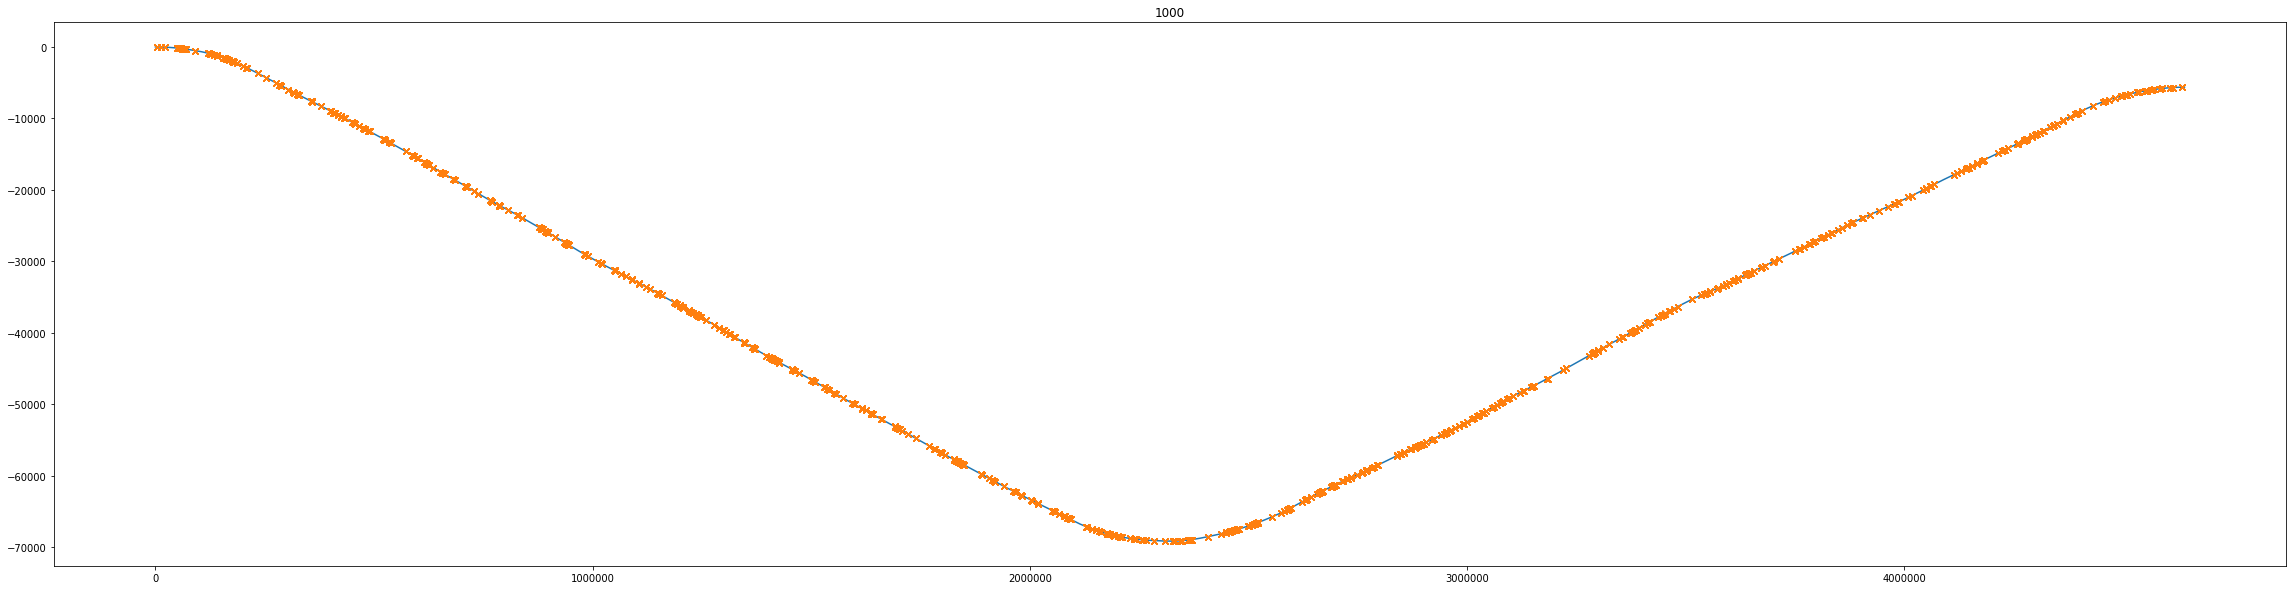

In [73]:
orite.plot_region_list(dope_regions, max_cgc,rotated=True)

In [74]:
orite.sort_regions_by_score(dope_regions)


dopest_regions = dope_regions[:100]




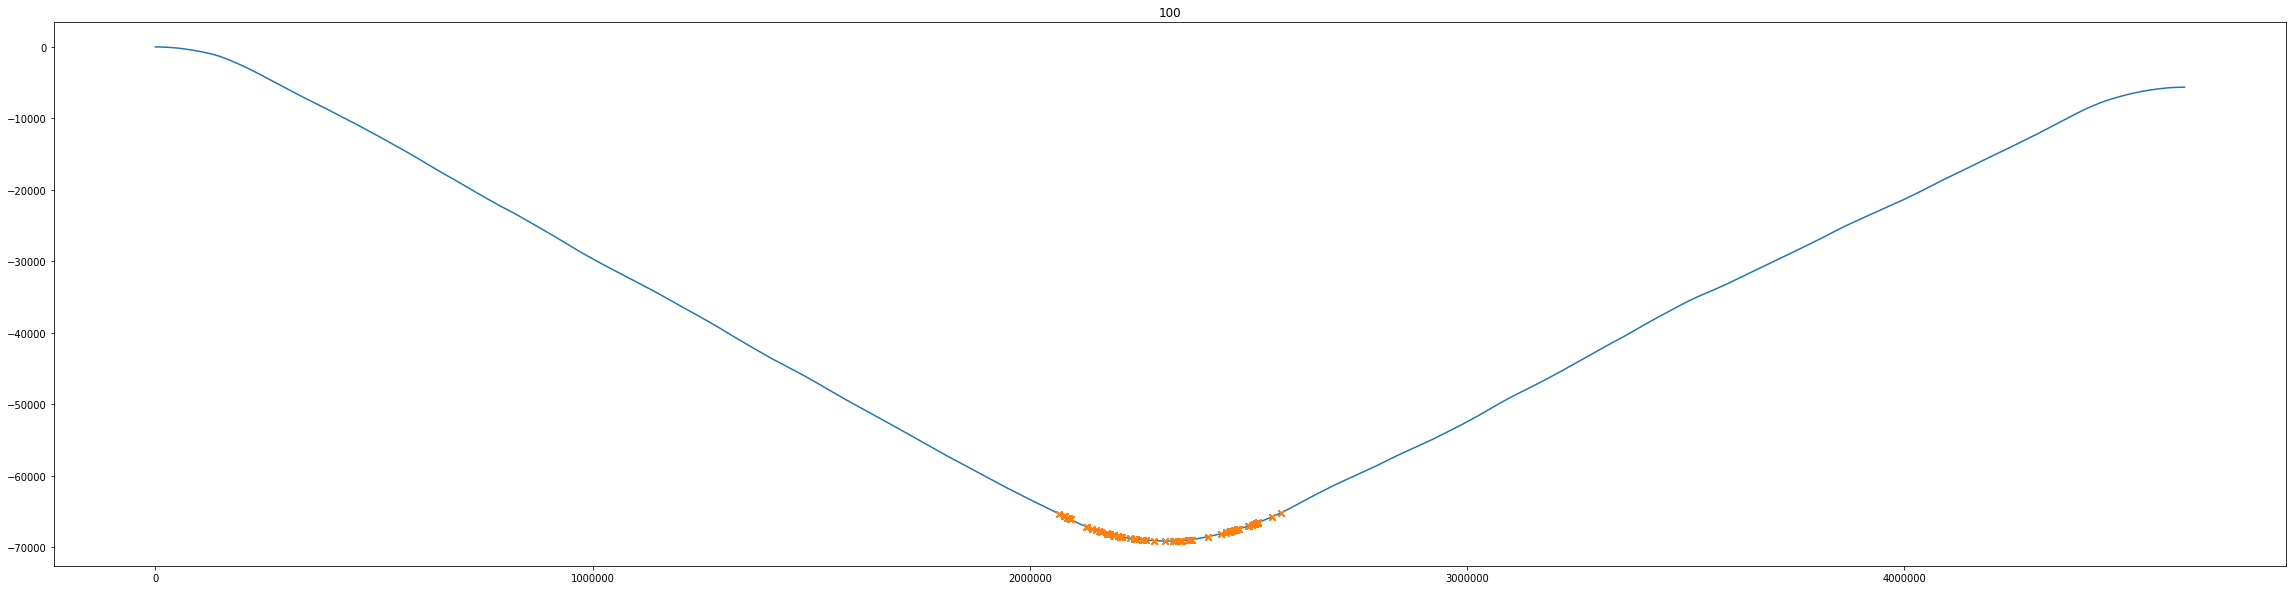

In [75]:
orite.plot_region_list(dopest_regions, max_cgc,rotated=True)